### **What is K-Nearest Neighbors (KNN)?**
K-Nearest Neighbors is a supervised machine learning algorithm used for both classification and regression. The idea behind KNN is pretty simple: When trying to classify or predict the label for a data point, KNN looks at the ‘K’ nearest data points (neighbors) to a new data point in terms of distance (proximity) and assigns the majority class (for classification) or averages the values (for regression).

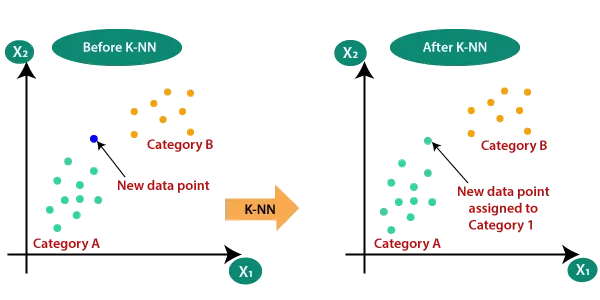
### **An Example:**
Imagine you want to classify a fruit as an apple or an orange based on features like color and weight. KNN looks at the ‘K’ closest fruits in the dataset to your new fruit and assigns the majority class (if most of the nearest neighbors are apples, it’ll classify the fruit as an apple).
### **Mathematical Perspective:**
KNN looks at the proximity of a new data point to its known neighbors to make a prediction. The distance (usually Euclidean) between two points x and y is calculated. The ‘K’ nearest points are then chosen.

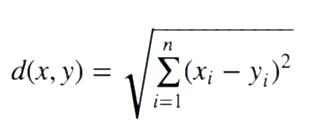

In [7]:
from collections import Counter
import numpy as np


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]


KNN classification accuracy 1.0


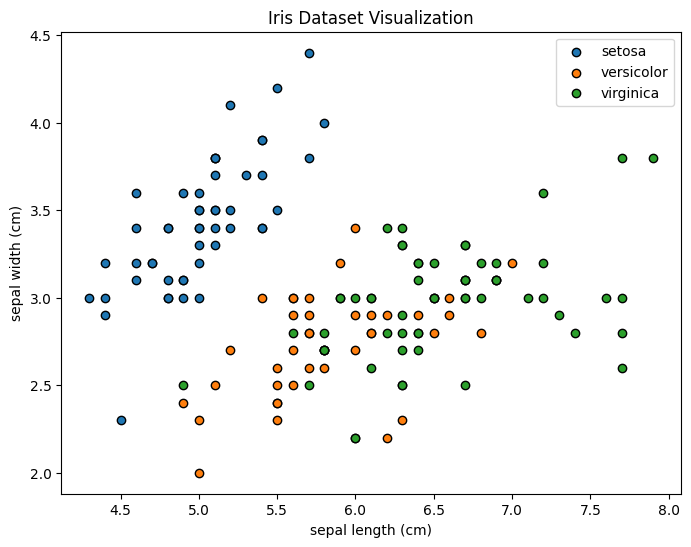

In [8]:

#testing
if __name__ == "__main__":
    # Imports
    from matplotlib.colors import ListedColormap
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt


    cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    iris = datasets.load_iris()
    X, y = iris.data, iris.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    k = 3
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print("KNN classification accuracy", accuracy(y_test, predictions))

    # Scatter plot of the first two features
    plt.figure(figsize=(8, 6))
    for i, target_name in enumerate(iris.target_names):
        plt.scatter(
            X[y == i, 0], X[y == i, 1],
            label=target_name, edgecolor="k"
        )
    plt.title("Iris Dataset Visualization")
    plt.xlabel(iris.feature_names[0])  # Sepal length
    plt.ylabel(iris.feature_names[1])  # Sepal width
    plt.legend()
    plt.show()
